# Generating Punks with a Variational Autoencoder

In [1]:
import sys
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Load pallets library

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from pallets import images as I, datasets as DS, models as M, logging as L


In [3]:
# To GPU, or not to GPU
device = M.get_device(require_gpu=True)

# Logging
L.init_logger()


<Logger pallets (INFO)>

## Prepare Datasets

In [4]:
all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.FastOneHotCPunksDataset(device, mapper, test_size=1000)


INFO | loading punk images
INFO | - image 0
INFO | - image 1000
INFO | - image 2000
INFO | - image 3000
INFO | - image 4000
INFO | - image 5000
INFO | - image 6000
INFO | - image 7000
INFO | - image 8000
INFO | - image 9000
INFO | punk images complete
INFO | loading punk labels: ../../cpunks-10k/cpunks/data/punks.json


In [5]:
batch_size = 32
num_workers = 0

train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
test_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler, num_workers=num_workers
)


## Convolutional VAE

In [6]:
# Cue training montage

model = M.vae.VAE(222, (64, 32), 20)
criterion = M.vae.Loss()

train_losses, test_losses = M.vae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=1e-03, epochs=50
)


INFO | model: pallets.models.vae.VAE
INFO | criterion: pallets.models.vae.Loss
INFO | learn rate: 0.001
INFO | epochs: 50
INFO | epoch 1 (  0%) loss: 511434.656250
INFO | epoch 1 ( 35%) loss: 29068.487648
INFO | epoch 1 ( 70%) loss: 16498.244375
INFO | epoch 1 (100%) loss: 12724.692905
INFO | epoch 1 (test) loss: 3273.220243
INFO | epoch 2 (  0%) loss: 3343.030518
INFO | epoch 2 ( 35%) loss: 3256.372143
INFO | epoch 2 ( 70%) loss: 3218.057014
INFO | epoch 2 (100%) loss: 3150.602561
INFO | epoch 2 (test) loss: 2839.882257
INFO | epoch 3 (  0%) loss: 2946.720703
INFO | epoch 3 ( 35%) loss: 2836.684706
INFO | epoch 3 ( 70%) loss: 2797.466622
INFO | epoch 3 (100%) loss: 2764.208574
INFO | epoch 3 (test) loss: 2619.762283
INFO | epoch 4 (  0%) loss: 2808.705322
INFO | epoch 4 ( 35%) loss: 2664.948211
INFO | epoch 4 ( 70%) loss: 2646.614847
INFO | epoch 4 (100%) loss: 2626.749254
INFO | epoch 4 (test) loss: 2550.433319
INFO | epoch 5 (  0%) loss: 2736.033203
INFO | epoch 5 ( 35%) loss: 2574.

In [7]:
M.save('vae.conv', model, train_losses, test_losses)

INFO | model blob saved to /home/jmsdnns/ML/pallets/saved/vae.conv.pkl
INFO | training losses saved to /home/jmsdnns/ML/pallets/saved/vae.conv.json


# Model Output to Image

In [8]:
# model, train_losses, test_losses = M.load('vae.conv')


In [9]:
# Generate new image

z = torch.randn(1, 20).to(device)
with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)


torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])


torch.Size([4, 24, 24])


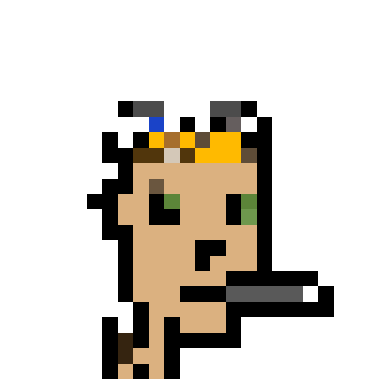

In [10]:
decoded = DS.one_hot_to_rgba(decoded_one_hot, mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


In [11]:
train_losses


[25449.385809715757,
 6301.205121412345,
 5528.417148454815,
 5253.498508318096,
 5050.805386157746,
 4829.7636238260475,
 4658.484751167027,
 4454.947724903729,
 4059.0967591197777,
 3298.209055582682,
 2840.2415420856883,
 2641.3358420514046,
 2499.525977168523,
 2370.1587784138133,
 2256.3882232016704,
 2101.5591742332945,
 2000.2028825908687,
 1915.9025196048385,
 1847.879730982138,
 1795.792807396422,
 1739.848814186475,
 1704.251161832336,
 1653.8070017496746,
 1628.5849802003684,
 1598.8061205275515,
 1567.15677594124,
 1544.390745771692,
 1504.287884218473,
 1467.9815663006289,
 1411.9188283284504,
 1387.5658067202737,
 1361.4245265663094,
 1338.0329988087324,
 1333.939634498975,
 1317.6607694152399,
 1301.130537263045,
 1291.6314263851084,
 1270.4872854246316,
 1252.386389766179,
 1230.5118515339304,
 1214.758158582322,
 1203.1773111870948,
 1164.1079891015452,
 1146.1370556337613,
 1136.621841106009,
 1116.6025332187085,
 1118.8835603971008,
 1097.272653999058,
 1100.82710239

In [12]:
test_losses


[6546.440486907959,
 5679.764514923096,
 5239.524566650391,
 5100.866638183594,
 4817.626312255859,
 4650.981986999512,
 4507.583950042725,
 4274.770927429199,
 3684.0048027038574,
 2935.455207824707,
 2680.0438175201416,
 2506.112428665161,
 2387.5635948181152,
 2291.5786533355713,
 2175.6063232421875,
 2016.8313579559326,
 1918.2843894958496,
 1896.3497438430786,
 1823.5156269073486,
 1779.1488361358643,
 1760.3717527389526,
 1669.8369884490967,
 1643.7167053222656,
 1582.038818359375,
 1588.039321899414,
 1515.4738388061523,
 1530.0146684646606,
 1492.1781787872314,
 1438.6562156677246,
 1394.9535636901855,
 1401.098346710205,
 1335.3192729949951,
 1314.8713603019714,
 1313.771499633789,
 1274.86030960083,
 1292.6840991973877,
 1259.3219480514526,
 1276.024866104126,
 1214.5118684768677,
 1216.5944375991821,
 1187.0912537574768,
 1154.4135065078735,
 1125.01948928833,
 1122.0982236862183,
 1109.622163772583,
 1097.1014909744263,
 1074.5530376434326,
 1124.150330543518,
 1082.4375815

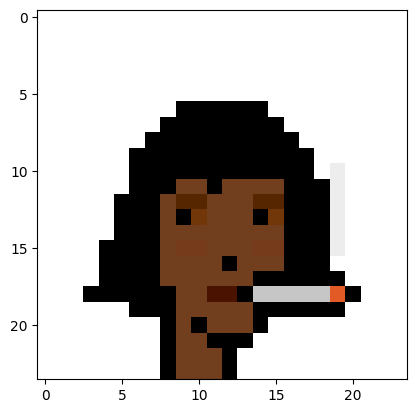

In [13]:
punk = I.get_punk_tensor(1000)

plt.imshow(transforms.functional.to_pil_image(punk))
plt.show()



torch.Size([1, 222, 24, 24])


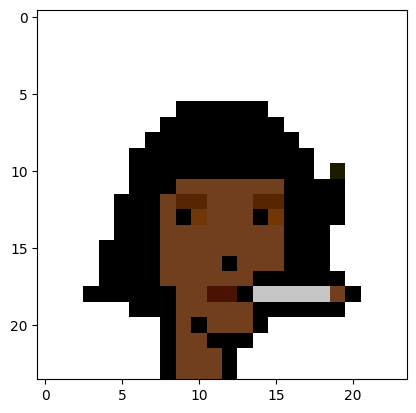

In [14]:
punk = I.get_punk_tensor(1000)

p = DS.rgba_to_one_hot(punk, mapper)
p = p.unsqueeze(0)
p = p.to(device)

model.eval()
with torch.no_grad():
    reconstructed, mu, logcar = model.forward(p)
    print(reconstructed.shape)

recon_punk = reconstructed[0].cpu()
recon_punk = DS.one_hot_to_rgba(recon_punk, mapper)
plt.imshow(transforms.functional.to_pil_image(recon_punk.cpu()))
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

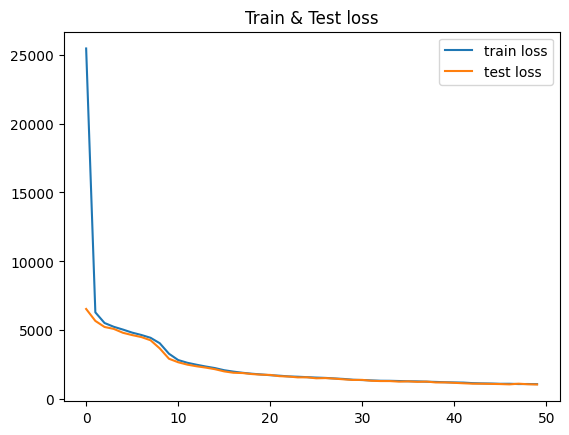

In [15]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show
